# Leer y Escribir archivos

## Texto

Podemos leer y escribir archivos usando la función `open()`

```
open(<ruta>, mode=<modo>, enconding="utf8")
```

existen distintos modos para cargar nuestro archivo, pero veremos estos tres:

* "r" : Solo lectura (read-only)
* "w" : Solo escritura (write-only). **Cuidado!** se sobreescribe todo el archivo!
* "a" : Agregar (append)

el `encoding` "utf8" o "utf-8" es el formato de codificación que nos permite interpretar correctamente texto en español (el precio a pagar por usar la letra ñ) https://es.wikipedia.org/wiki/UTF-8.

Luego de abrir un archivo tenemos que cerrarlo usando el método `.close()`

In [ ]:
file = open("salida.txt", "w")
file.write("escribo mi archivo")
file.close()

### Escribir un archivo

Usando el modo de escritura "w" (de *write*) podemos abrir un archivo y escribir sobre él (borrando todo su contenido, CUIDADO!), o crearlo en caso de que no exista

In [ ]:
file = open("texto.txt", mode="w", encoding="utf-8") 
file.write("Estoy escribiendo una línea!")
file.close() # cerramos el archivos

Para evitar tener que cerrar el archivo tenemos la sentencia `with`, un tipo de Gestor de Contexto en Python.

In [10]:
with open("texto.txt", mode="w", encoding="utf8") as file:
    # Si quiero escribir varias líneas uso "\n"
    file.write("Línea 1\n")
    file.write("Línea 2\n")
    file.write("Línea 3\n")
    print(file.closed) # El archivo sigue abierto

print(file.closed) # El archivo ahora está cerrado


False
True


### Leyendo un Archivo

Para leer un archivo debemos usar el modo lectura "r" (de *read*)

In [12]:
with open("texto.txt", mode="r", encoding="utf8") as file:
    
   # El método read() lee todo el contenido del archivo:
   texto = file.read()

print(texto)

Línea 1
Línea 2
Línea 3



In [14]:
with open("texto.txt", mode="r", encoding="utf8") as file:
    
   # El método readline() lee solo una línea.
   linea = file.readline()

print(linea)

Línea 1



In [ ]:
with open("texto.txt", mode="r", encoding="utf8") as file:
    
   # El método readlines() lee todas las lineas y las guarda en una lista
   lineas = file.readlines()

print(lineas)

['Línea 1\n', 'Línea 2\n', 'Línea 3\n']


In [15]:
with open("texto.txt", mode="a", encoding="utf8") as file:
    file.write("Una última línea\n")

In [ ]:
with open("texto.txt", "r", encoding="utf8") as file:
    texto = file.read() # todo el archivo como una string
    print(texto)

Estoy escribiendo una línea!
Estoy escribiendo otra línea!
Una última línea



In [ ]:
with open("texto.txt", "r", encoding="utf8") as file:
    for line in file.readlines():
        print(line) # con end="" evito que print() cree una nueva línea vacía

Línea 1
Línea 2
Línea 3
Una última línea


### Ejercicios:

1) Cómo podemos contar el número de palabras en un texto?
2) Cómo podemos ver cuantas veces se repite una dada palabra?

### Pathlib

Una librería muy útil para moverme entre carpetas y explorar archivos desde python


In [52]:
import pathlib

path = pathlib.Path("") 

print(path)
print(path.absolute())

.
c:\Users\eliaz\OneDrive\Documentos\1-proyectos\Curso Python Rectorado\curso-python\notebooks


In [26]:
import pathlib

path = pathlib.Path("") 

for file in path.iterdir():
    print(file)

00-sintaxis-basica-y-variables.ipynb
01-funciones.ipynb
02-metodos-de-cadenas.ipynb
03-control-de-flujo.ipynb
04-estructuras-de-datos.ipynb
05-bucles.ipynb
06-importar-librerias.ipynb
07-leer-y-escribir-archivos.ipynb
08-manejo-de-exepciones.ipynb
09-clases.ipynb
10-testing.ipynb
salida.txt
texto.txt


In [27]:
import pathlib

path = pathlib.Path("") 

for file in path.iterdir():
    if file.suffix == ".txt": # puedo imprimir solo ciertos archivos
        print(file)

salida.txt
texto.txt


In [ ]:
# Puedo crear directorios

nueva_carpeta = path / "nueva_carpeta"
nueva_carpeta.mkdir() # creo la carpeta


## JSON

JSON es un formato que nace con JavaScript y la web, muy utilizado para compartir información. En python lo podemos utilizar para serializar (guardar) algunos objetos como pueden ser las listas o los diccionarios

In [31]:
import json 

lista_muy_importante = ["receta", "super", "secreta"]

with open("secreto.json", "w") as file:
    json.dump(lista_muy_importante, file)


In [35]:
with open("secreto.json", "r") as file:
    lista_leida = json.load(file)

lista_leida.append("hola")
lista_leida

['receta', 'super', 'secreta', 'hola']

In [39]:
notas_de_alumnos = {"Juan" : 9, "Victoria" : 8, "José" : 6}

with open("notas.json", "w", encoding="utf-8") as file:
    json.dump(notas_de_alumnos, file)

In [43]:
with open("notas.json", "r") as file:
    dic = json.load(file)

dic["Blas"] = 5

print(dic)

{'Juan': 9, 'Victoria': 8, 'José': 6, 'Blas': 5}


## Pandas

Pandas es una librería muy popular para trabajar con tablas tipo excel. Esta librería nos ofrece muchas herramientas, pero una de ellas es poder leer y escribir archivos de Excel

In [10]:
import pandas as pd

resultados_carrera = pd.read_excel("../datos/resultados_carrera.xlsx")
resultados_carrera

,persona,tiempo,categoria
0,Andres Pereira,35,5k
1,Julian Torres,64,10k
2,Alejo Lobo,55,10k
3,Alejandro Arue,58,10k
4,Guillermo Andina,27,5k
5,Leandro de Haro,31,5k
6,Fernando Ortega,58,10k
7,Carolina Fernandez,71,10k
8,Romina Perez,19,5k


In [ ]:
# También puedo crear un excel a partir de un diccionario
casas = {
    "personas" : ["harry", "hermione", "ron"], 
    "casa" : ["Griffindor", "Griffindor", "Griffindor"]
}

# primero creo un DataFrame
casas_df = pd.DataFrame(casas)

# Luego uso el método to_excel()
casas_df.to_excel("casas.xlsx") # es importante la extensión .xlsx

## Imagenes

Existen librerías como PIL https://pillow.readthedocs.io/en/stable/handbook/tutorial.html que nos permiten manipular imagenes. Veamos un par de ejemplos

In [2]:
from PIL import Image 

koala = Image.open(r"..\datos\koala.jpg")
koala.show()

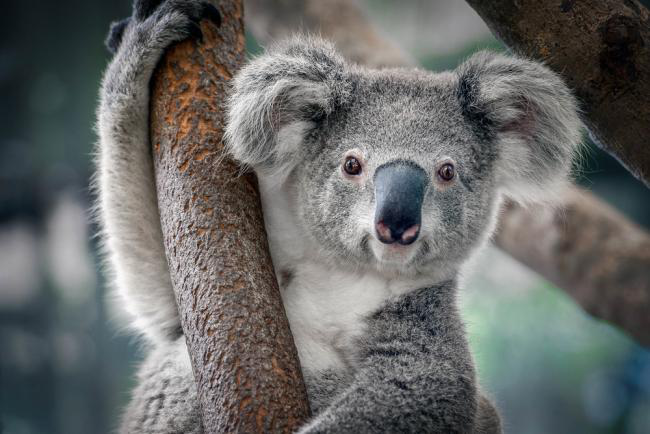

In [5]:
koala

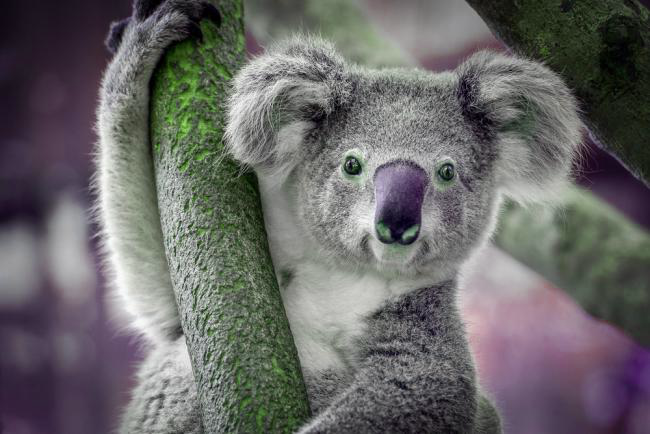

In [23]:
# Puedo separar los canales R G B (Rojo, Verde y Azul)
r, g, b = koala.split()

# Y puedo colocarlos en otro orden
Image.merge("RGB", (g, r, b))

(650, 434)


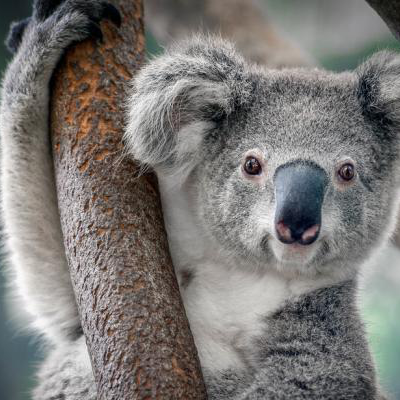

In [49]:
print(koala.size)

# Puedo recortar la imagen
koala_recorte = koala.crop((100, 0, 500, 400))
koala_recorte

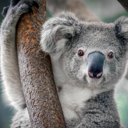

In [53]:
# Puedo cambiar su tamaño
koala_mini = koala_recorte.resize((128, 128))
koala_mini

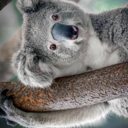

In [58]:
#puedo rotar la imagen
koala_90 = koala_mini.rotate(90)
koala_90

In [61]:
# Puedo hacer una animación (un gif)
imagenes = [koala_mini, koala_mini.rotate(90), koala_mini.rotate(180), koala_mini.rotate(270)]

imagenes[0].save(
    "koala_animado.gif",
    save_all=True,
    append_images=imagenes[1:],
    duration=500, # duración en milisegundos de cada frame
    loop=0 # bucle infinito
)